<a href="https://colab.research.google.com/github/DhrumilV/Prediction-using-Unsupervised-ML/blob/main/Prediction%20of%20Clusters%20using%20Unsupervised%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics

#**Loading the Dataset**


In [13]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df = df.set_index('Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
X = df.iloc[:, :-1].values

#**Elbow Method**

In [46]:
wss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i, random_state=0)
  kmeans_model.fit(X)
  wss.append(kmeans_model.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

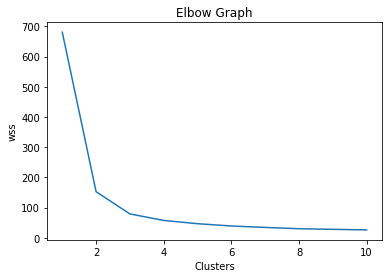

In [47]:
plt.plot(range(1,11),wss)
plt.xlabel('Clusters')
plt.ylabel('wss')
plt.title('Elbow Graph')

According to Elbow method, for choosing clusters,The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

Hence, **3 Clusters** should be selected according to Elbow Method.

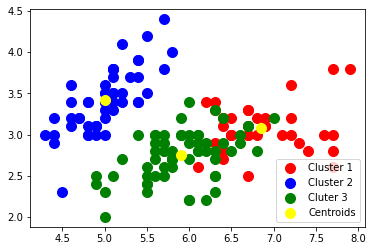

In [65]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluter 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

#**Average Silhouette Method**

In [48]:
avg_sil = []
for i in range(2,11):
  kmeans_model = KMeans(n_clusters=i, random_state=0)
  kmeans_model.fit(X)
  score = metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')
  avg_sil.append(score)

Text(0.5, 1.0, 'Average silhouette Graph')

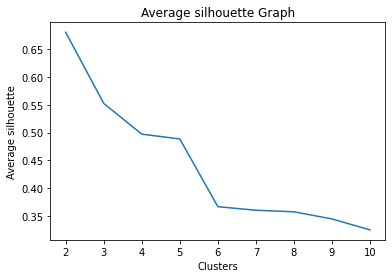

In [49]:
plt.plot(range(2,11),avg_sil)
plt.xlabel('Clusters')
plt.ylabel('Average silhouette')
plt.title('Average silhouette Graph')

According to Average silhouette method, for choosing clusters, The location of the maximum is considered as the appropriate number of clusters.

Hence, **3 Clusters** should be selected according to Average Silhouette Method.

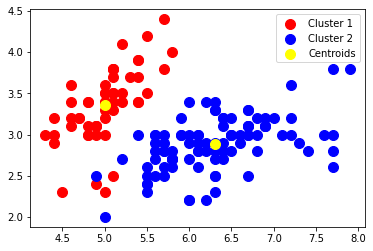

In [66]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluter 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()